In [112]:
#Tugas Praktikum 3 dikumpulkan di ELENA maksimal Kamis, 24 Oktober 2024:

# 1. Download data dari Kaggle (https://www.kaggle.com/)
# 2. Eksplorasi data tersebut, tunjukkan min, max, rata-rata, dst
# 3. Lakukan proses data cleaning yang dibutuhkan
# 4. Lakukan visualisasi data dan analisis lebih lanjut
# 5. Lakukan 3 jenis normalization ke data tersebut

# Laporan Praktikum disubmit dengan format PDF
# Format nama: Nama_NIM_Laporan Praktikum 3
# berisi:
# - hasil dari Tugas Praktikum Mandiri 3
# - copy paste atau screenshot kode dan output
# - penjelasan dari masing-masing kode dan output
# - sertakan link github Praktikum 3 dan Praktikum Mandiri 3

In [113]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [114]:
# menyimpan data file csv ke dalam variable
df_nvidia = pd.read_csv('nvidia_stock_prices.csv')

# mencetak dataframe csv
print(df_nvidia)

            Date       Open       High        Low      Close      Volume
0     2004-01-02   0.196417   0.199083   0.192333   0.192333   436416000
1     2004-01-05   0.195250   0.199917   0.193500   0.198583   575292000
2     2004-01-06   0.198000   0.209417   0.197083   0.206667  1093344000
3     2004-01-07   0.204333   0.209500   0.202917   0.208500   673032000
4     2004-01-08   0.211083   0.212083   0.207250   0.209250   433752000
...          ...        ...        ...        ...        ...         ...
5028  2023-12-22  49.195000  49.382999  48.466999  48.830002   252507000
5029  2023-12-26  48.967999  49.599998  48.959999  49.278999   244200000
5030  2023-12-27  49.511002  49.680000  49.084999  49.417000   233648000
5031  2023-12-28  49.643002  49.883999  49.411999  49.521999   246587000
5032  2023-12-29  49.813000  49.997002  48.750999  49.521999   389293000

[5033 rows x 6 columns]


In [115]:
# mengecek data kosong
df_nvidia.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [116]:
# melihat tipe data
df_nvidia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5033 non-null   object 
 1   Open    5033 non-null   float64
 2   High    5033 non-null   float64
 3   Low     5033 non-null   float64
 4   Close   5033 non-null   float64
 5   Volume  5033 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 236.0+ KB


In [117]:
# mengubah kolom date menjadi tipe data
df_nvidia['Date'] = pd.to_datetime(df_nvidia['Date'])

# pengecekan kembali tipe data
df_nvidia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5033 non-null   datetime64[ns]
 1   Open    5033 non-null   float64       
 2   High    5033 non-null   float64       
 3   Low     5033 non-null   float64       
 4   Close   5033 non-null   float64       
 5   Volume  5033 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 236.0 KB


In [118]:
# membuat variable closing saham nvidia tahun 2023
closing_tahun_2023 = df_nvidia['Close'][(df_nvidia['Date'].dt.year == 2023)]

# print(transaksi_tahun_2023)
print(closing_tahun_2023)

4783    14.315000
4784    14.749000
4785    14.265000
4786    14.859000
4787    15.628000
          ...    
5028    48.830002
5029    49.278999
5030    49.417000
5031    49.521999
5032    49.521999
Name: Close, Length: 250, dtype: float64


In [119]:
# mencari nilai min closing saham nvidia tahun 2023
print('Nilai closing min tahun 2023: ',
      np.min(closing_tahun_2023))

# mencari nilai max closing saham nvidia tahun 2023
print('Nilai closing max tahun 2023: ',
      np.max(closing_tahun_2023))

Nilai closing min tahun 2023:  14.265000343322754
Nilai closing max tahun 2023:  50.40900039672852


In [120]:
# mencari nilai mean closing saham nvidia tahun 2023
print('Nilai mean closing tahun 2023: ',
      np.mean(closing_tahun_2023))

Nilai mean closing tahun 2023:  36.56925994110107


In [121]:
# mencari nilai median closing saham nvidia tahun 2023
print('Nilai median closing tahun 2023: ',
      np.median(closing_tahun_2023))

Nilai median closing tahun 2023:  41.89349937438965


In [122]:
# membuat kolom baru (Year) di dataframe saham nvidia
df_nvidia['Year'] = df_nvidia['Date'].dt.year   

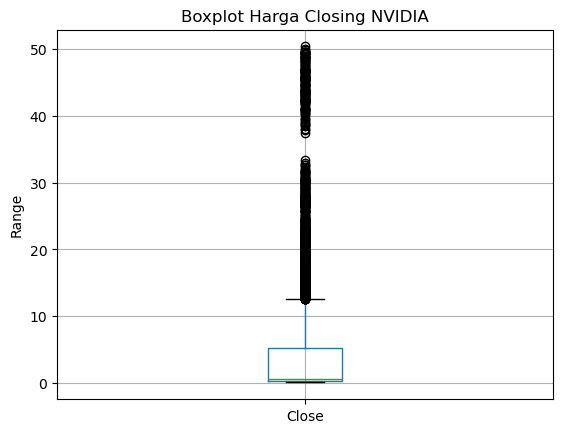

In [123]:
# membuat grafik
df_nvidia.boxplot(column=['Close'])
plt.title('Boxplot Harga Closing NVIDIA')
plt.ylabel('Range')

# mencetak hasil grafik
plt.show()

In [124]:
# menghitung rata-rata harga closing per tahun
yearly_close = df_nvidia.groupby('Year')['Close'].median()
yearly_close

Year
2004     0.173333
2005     0.231208
2006     0.441333
2007     0.716333
2008     0.441500
2009     0.291500
2010     0.324375
2011     0.393125
2012     0.332250
2013     0.361250
2014     0.465875
2015     0.556625
2016     1.190125
2017     3.897000
2018     6.056000
2019     4.281875
2020     9.612250
2021    19.206750
2022    17.222000
2023    41.893499
Name: Close, dtype: float64

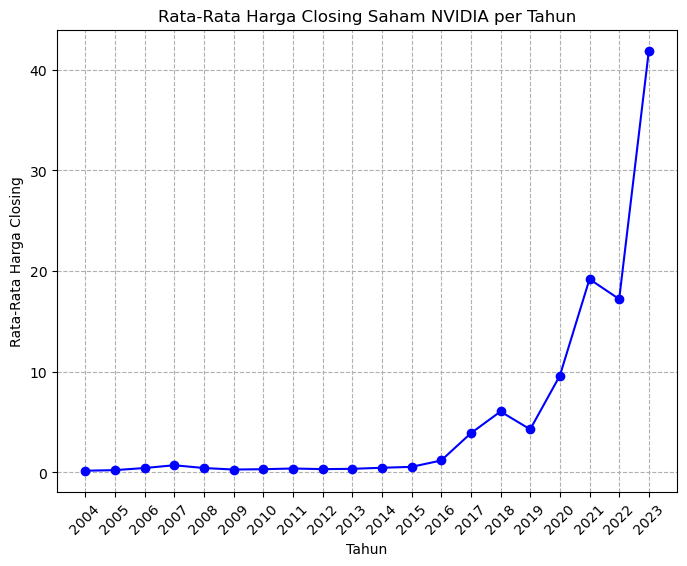

In [125]:
# membuat grafik rata-rata harga closing saham nvidia per tahun
# membuat grafik garis
plt.figure(figsize=(8,6))
yearly_close.plot(kind='line', marker='o', color='blue')
plt.title('Rata-Rata Harga Closing Saham NVIDIA per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Harga Closing')
plt.grid(linestyle='--')
plt.xticks(yearly_close.index, rotation=45)

# mencetak grafik
plt.show()

In [126]:
# menghitung total harga closing per tahun
yearly_volume = df_nvidia.groupby('Year')['Volume'].sum()
yearly_volume

Year
2004    171998196000
2005    155516772000
2006    154058556000
2007    152062186000
2008    204699404000
2009    193517952000
2010    186812132000
2011    230766636000
2012    120775680000
2013     89147376000
2014     71556936000
2015     78187564000
2016    111598604000
2017    172152468000
2018    137569608000
2019    115012716000
2020    121656380000
2021     90608822000
2022    136333969000
2023    118389365000
Name: Volume, dtype: int64

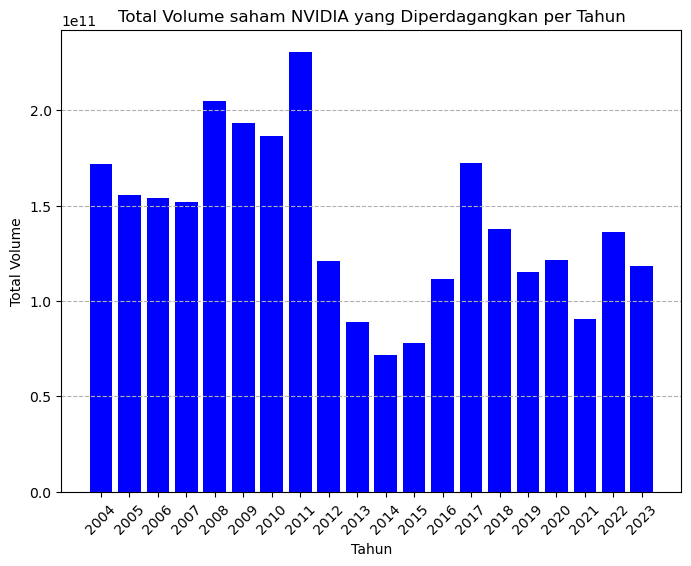

In [127]:
# membuat grafik
plt.figure(figsize=(8, 6))
plt.bar(yearly_volume.index, yearly_volume.values, color='blue')
plt.title('Total Volume saham NVIDIA yang Diperdagangkan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Volume')
plt.xticks(yearly_volume.index, rotation=45)
plt.grid(axis='y', linestyle='--')

# mencetak grafik
plt.show()


In [128]:
# menyimpan kolom yang ingin dinormalisasi dalam variable
normalisasi_kolom = ['Open', 'Close', 'High', 'Low', 'Volume']

In [129]:
# inisiali objek MinMaxScaler
minmax_scaler = MinMaxScaler()

# menyalin data nvidia ke variable baru
minmax_nvidia = df_nvidia.copy()

# normalisasi data
minmax_nvidia[normalisasi_kolom] = minmax_scaler.fit_transform(df_nvidia[normalisasi_kolom])

# cetak data yang dinormalisasi
print(minmax_nvidia)

           Date      Open      High       Low     Close    Volume  Year
0    2004-01-02  0.002310  0.002282  0.002328  0.002260  0.077483  2004
1    2004-01-05  0.002287  0.002299  0.002351  0.002384  0.105020  2004
2    2004-01-06  0.002342  0.002487  0.002424  0.002545  0.207741  2004
3    2004-01-07  0.002468  0.002489  0.002542  0.002581  0.124400  2004
4    2004-01-08  0.002603  0.002540  0.002630  0.002596  0.076955  2004
...         ...       ...       ...       ...       ...       ...   ...
5028 2023-12-22  0.979635  0.976914  0.980845  0.968627  0.041017  2023
5029 2023-12-26  0.975107  0.981214  0.990838  0.977548  0.039370  2023
5030 2023-12-27  0.985938  0.982800  0.993372  0.980290  0.037278  2023
5031 2023-12-28  0.988571  0.986842  1.000000  0.982376  0.039844  2023
5032 2023-12-29  0.991962  0.989081  0.986602  0.982376  0.068140  2023

[5033 rows x 7 columns]


In [130]:
# inisiali objek StandardScaler
standard_scaler = StandardScaler()

# menyalin data nvidia ke variable baru
standard_nvidia = df_nvidia.copy()

# normalisasi data
standard_nvidia[normalisasi_kolom] = standard_scaler.fit_transform(df_nvidia[normalisasi_kolom])

# cetak data yang dinormalisasi
print(standard_nvidia)

           Date      Open      High       Low     Close    Volume  Year
0    2004-01-02 -0.520403 -0.520832 -0.520360 -0.521020 -0.363894  2004
1    2004-01-05 -0.520524 -0.520747 -0.520237 -0.520372  0.049050  2004
2    2004-01-06 -0.520239 -0.519779 -0.519859 -0.519534  1.589462  2004
3    2004-01-07 -0.519582 -0.519770 -0.519242 -0.519344  0.339677  2004
4    2004-01-08 -0.518882 -0.519507 -0.518784 -0.519266 -0.371815  2004
...         ...       ...       ...       ...       ...       ...   ...
5028 2023-12-22  4.560847  4.492665  4.580449  4.522304 -0.910742  2023
5029 2023-12-26  4.537307  4.514784  4.632541  4.568861 -0.935442  2023
5030 2023-12-27  4.593617  4.522939  4.645749  4.583171 -0.966818  2023
5031 2023-12-28  4.607306  4.543734  4.680300  4.594059 -0.928345  2023
5032 2023-12-29  4.624935  4.555252  4.610457  4.594059 -0.504013  2023

[5033 rows x 7 columns]


In [131]:
# menyalin data nvidia ke variable baru
decimal_nvidia = df_nvidia.copy()

# normalisasi data
decimal_nvidia[normalisasi_kolom] = (
    (df_nvidia[normalisasi_kolom]) / (df_nvidia[normalisasi_kolom].max()))

# cetak data yang dinormalisasi
print(decimal_nvidia)

           Date      Open      High       Low     Close    Volume  Year
0    2004-01-02  0.003911  0.003938  0.003892  0.003815  0.085758  2004
1    2004-01-05  0.003888  0.003955  0.003916  0.003939  0.113047  2004
2    2004-01-06  0.003943  0.004143  0.003989  0.004100  0.214847  2004
3    2004-01-07  0.004069  0.004145  0.004107  0.004136  0.132254  2004
4    2004-01-08  0.004204  0.004196  0.004194  0.004151  0.085234  2004
...         ...       ...       ...       ...       ...       ...   ...
5028 2023-12-22  0.979668  0.976953  0.980875  0.968676  0.049619  2023
5029 2023-12-26  0.975147  0.981246  0.990852  0.977583  0.047986  2023
5030 2023-12-27  0.985961  0.982828  0.993382  0.980321  0.045913  2023
5031 2023-12-28  0.988589  0.986864  1.000000  0.982404  0.048455  2023
5032 2023-12-29  0.991975  0.989099  0.986623  0.982404  0.076498  2023

[5033 rows x 7 columns]


In [132]:
decimal_nvidia.max()

Date      2023-12-29 00:00:00
Open                      1.0
High                      1.0
Low                       1.0
Close                     1.0
Volume                    1.0
Year                     2023
dtype: object